In [67]:
import numpy as np
import pandas as pd
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")
from geopy.distance import geodesic
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.preprocessing import PolynomialFeatures
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
data = pd.read_csv('housing.csv')
data.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

# Descriptive Stat

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
data.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

In [5]:
data.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

## interpretation 
- **Total Rooms** and **Total Bedrooms** Both columns have very high maximum values compared to their means. indicating skewness.
- **Population** and **households** columns also have skewness.
- **total_bedrooms** has missing values.

# Preprocessing

In [7]:
# encode categorical column using one-hot encoding
data = pd.get_dummies(data, columns=['ocean_proximity'])

In [8]:
data.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value  \
0       322.0       126.0         8.3252            452600.0   
1      2401.0      1138.0         8.3014            358500.0   
2       496.0       177.0         7.2574            352100.0   
3       558.0       219.0         5.6431            341300.0   
4       565.0       259.0         3.8462            342200.0   

   ocean_proximity_<1H OCEAN  ocean_proximity_INLAND  ocean_proximity_ISLAND  \
0                      False                   False                   False   
1                      False                   False                   False   
2                      False                   False                   False   
3                      False                   False                   False   
4                      False                   False                   False   

   ocean_proximity_NEAR BAY  ocean_proximity_NEAR OCEAN  
0                      True                       False  
1                      True                       False  
2                      True                       False  
3                      True                       False  
4                      True                       False

In [9]:
# fill null values with median 
median_value = data['total_bedrooms'].median()
data['total_bedrooms'].fillna(median_value, inplace=True)

In [10]:
data.isna().sum()

longitude                     0
latitude                      0
housing_median_age            0
total_rooms                   0
total_bedrooms                0
population                    0
households                    0
median_income                 0
median_house_value            0
ocean_proximity_<1H OCEAN     0
ocean_proximity_INLAND        0
ocean_proximity_ISLAND        0
ocean_proximity_NEAR BAY      0
ocean_proximity_NEAR OCEAN    0
dtype: int64

# EDA

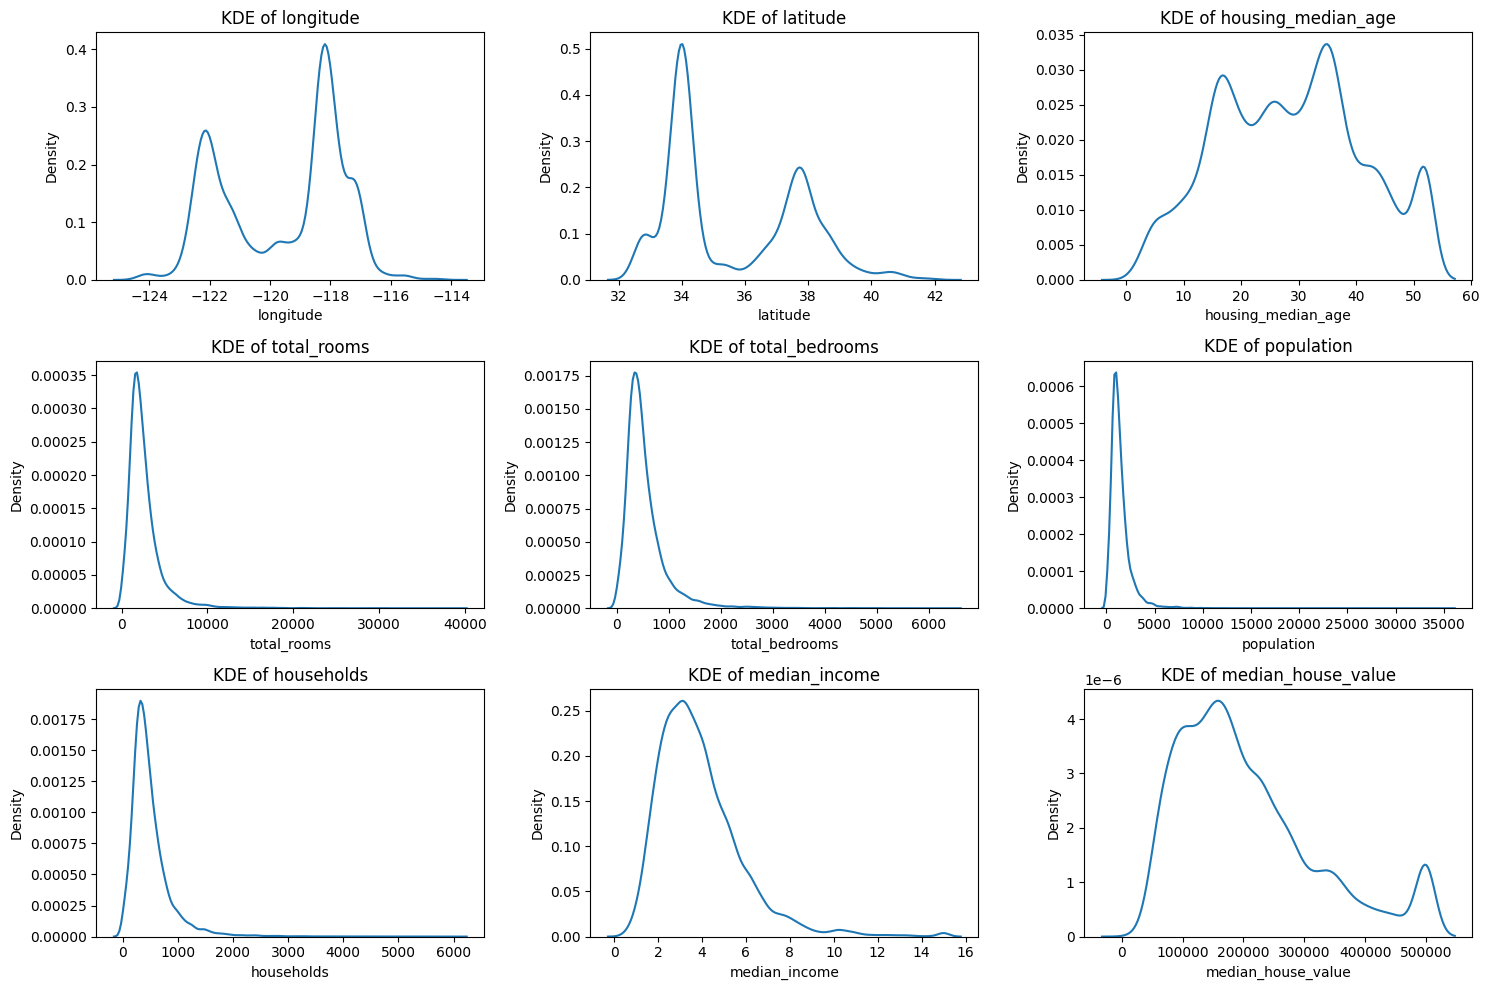

In [11]:
# visulizing skewed columns
import seaborn as sns
import matplotlib.pyplot as plt

numerical_columns = data.select_dtypes('number')
plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.kdeplot(data[column])
    plt.title(f"KDE of {column}")
plt.tight_layout()
plt.show()


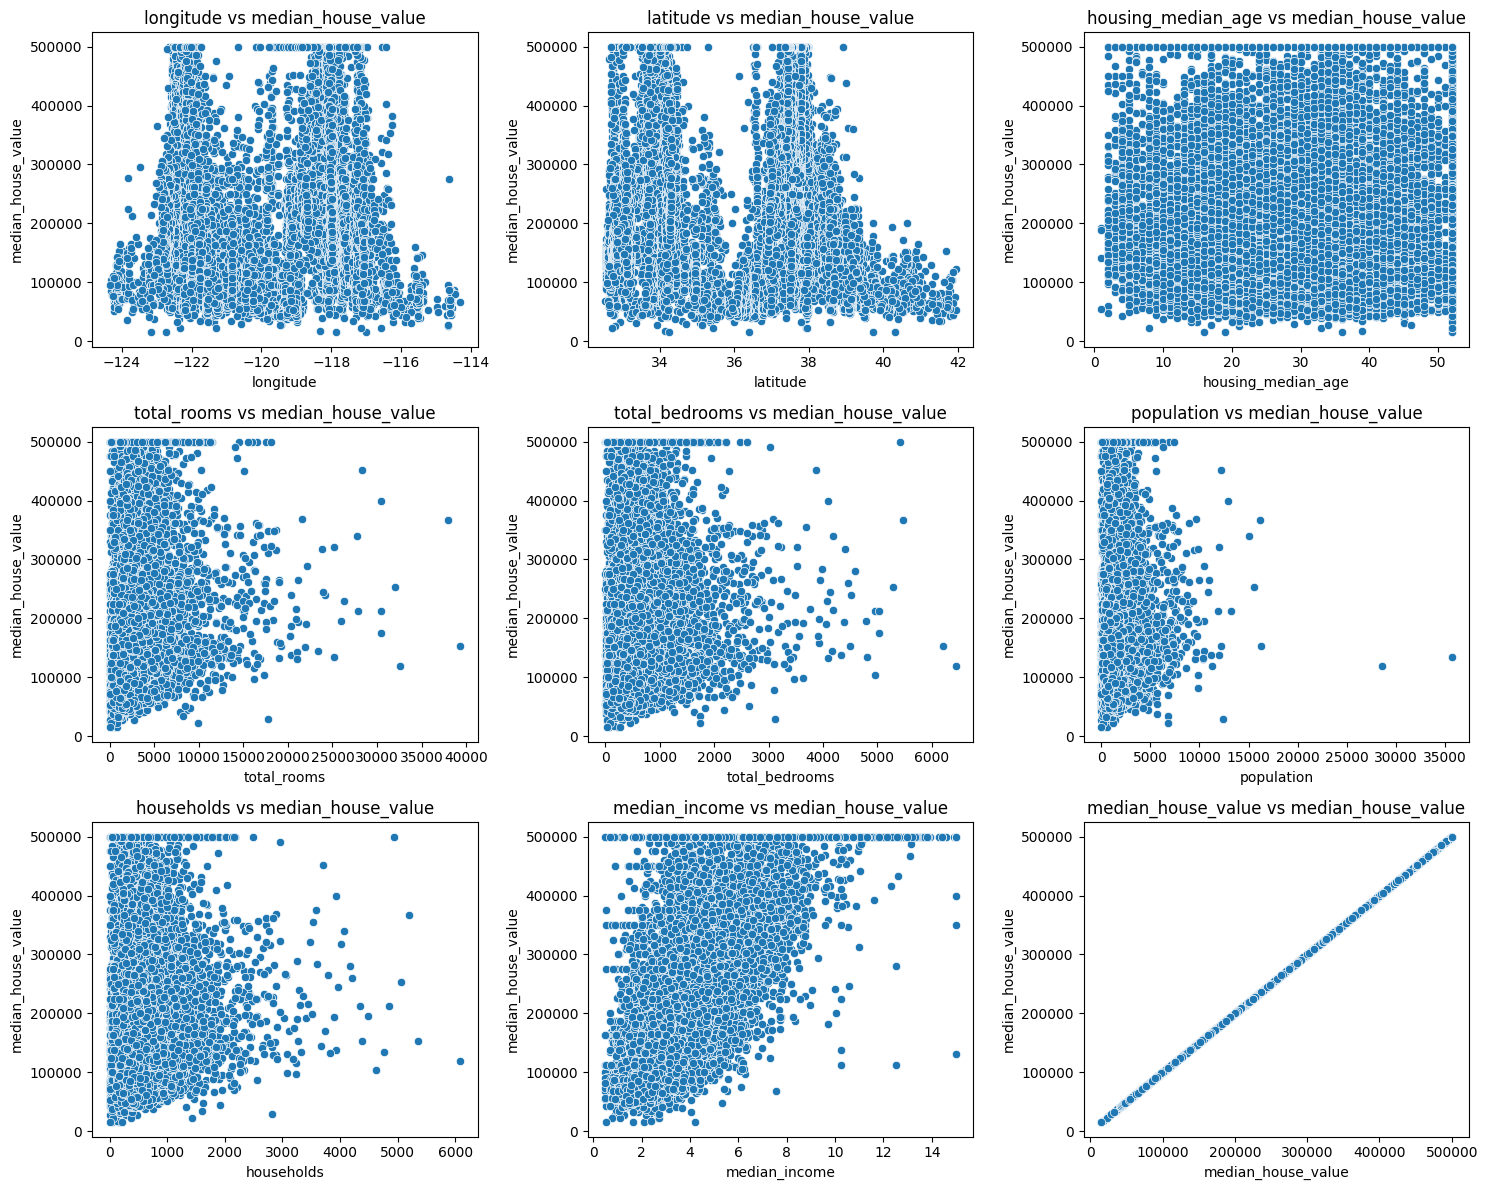

In [12]:
# understanding relationship between output feature
# Without 1 as the argument,the counting would start from 0, which might not align with the structure of our subplots. genrally counting starts from zero to avoid this we specified 1.
plt.figure(figsize=(15, 12))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.scatterplot(x=data[column], y=data['median_house_value'])
    plt.title(f"{column} vs {'median_house_value'}")
    plt.xlabel(column)
    plt.ylabel('median_house_value')
plt.tight_layout()
plt.show()

## interpretation 
- strongest relationship with house prices is median income.

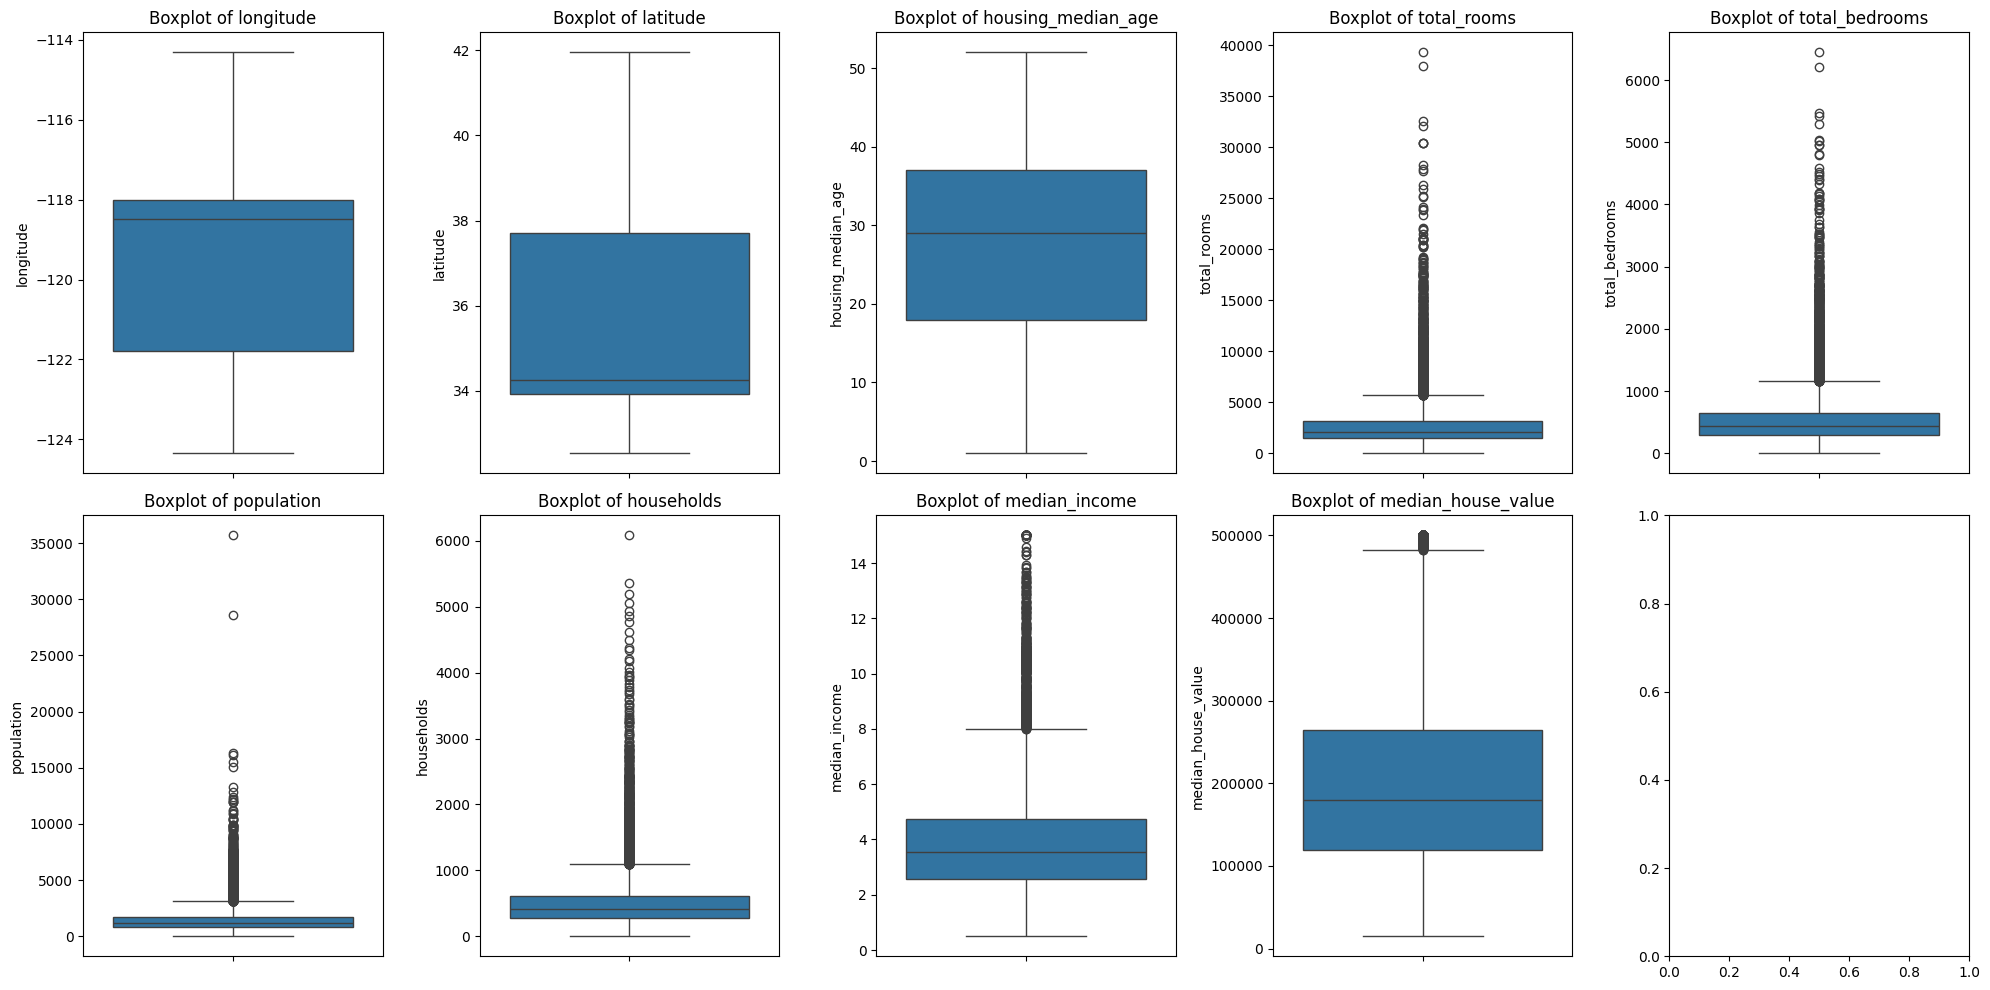

In [14]:
# identifying outliers
# subplots are  indexed from zero that why i didnt write 1 in enumerate.
boxplot_data = data.iloc[:,:9]
fig,axes = plt.subplots(nrows=2,ncols=5,figsize=(20,10))
axes = axes.flatten()
for i,column in enumerate(boxplot_data.columns):
    sns.boxplot(boxplot_data[column],ax=axes[i])
    axes[i].set_title(f'Boxplot of {column}')

plt.tight_layout()  
plt.show()

-  columns with outliers are **total_rooms,total_bedrooms,population,households,median_income,median_house_value**

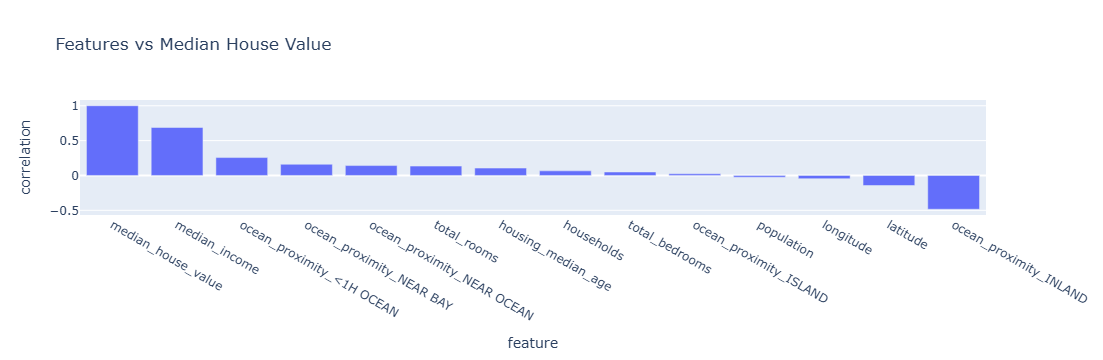

In [15]:
# understanding co-relation with output column
correlation = data.corr()
output = correlation['median_house_value'].sort_values(ascending=False)
output_df = output.reset_index()
output_df.columns = ['feature', 'correlation']

fig = px.bar(output_df, x='feature', y='correlation', title='Features vs Median House Value')
fig.show()

## interpretation 
- **median income and proximity to the ocean** are the important features

In [16]:
# outliers treatment
my_col = ['total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']
def remove_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25) 
        Q3 = df[col].quantile(0.75)  
        IQR = Q3 - Q1 
        lower_bound = Q1 - 1.5 * IQR  
        upper_bound = Q3 + 1.5 * IQR  
        
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

data_new = remove_outliers(data, my_col)

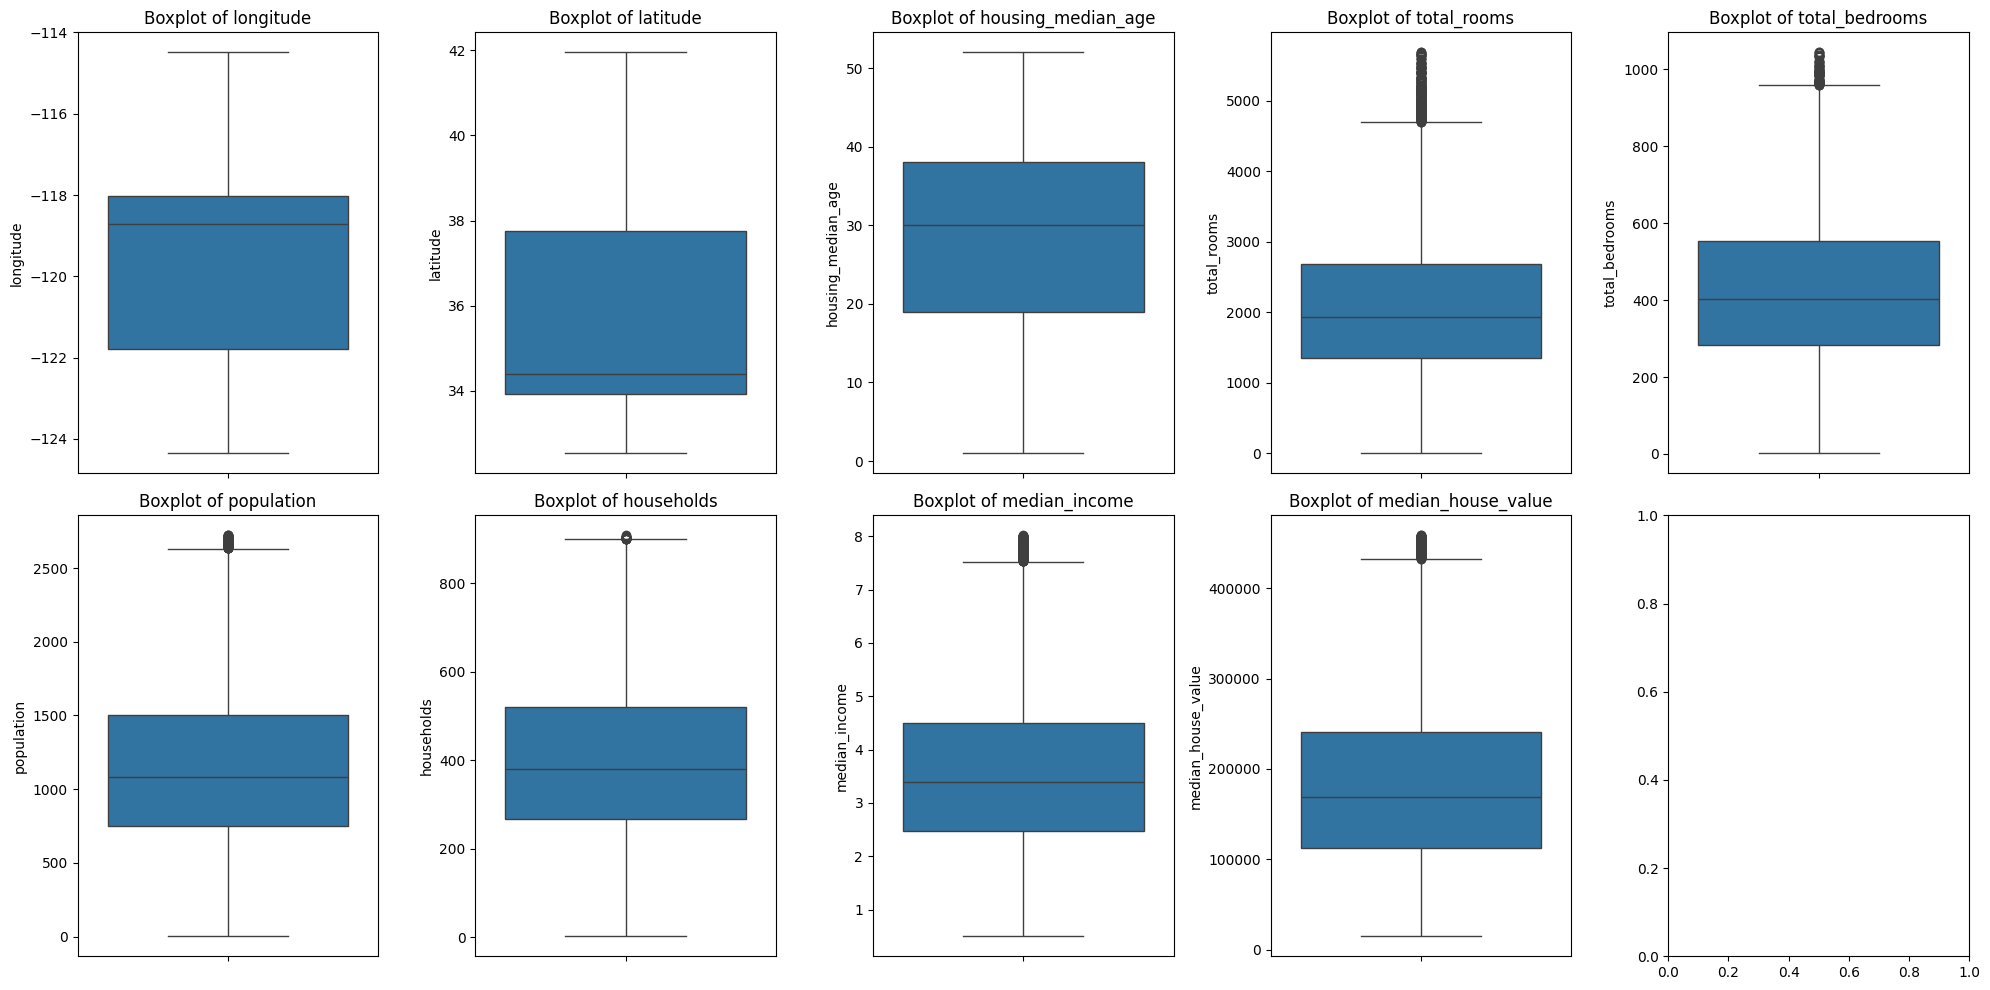

In [17]:
boxplot_data = data_new.iloc[:,:9]
fig,axes = plt.subplots(nrows=2,ncols=5,figsize=(20,10))
axes = axes.flatten()
for i,column in enumerate(boxplot_data.columns):
    sns.boxplot(boxplot_data[column],ax=axes[i])
    axes[i].set_title(f'Boxplot of {column}')

plt.tight_layout()  
plt.show()

# Feature Engineering 


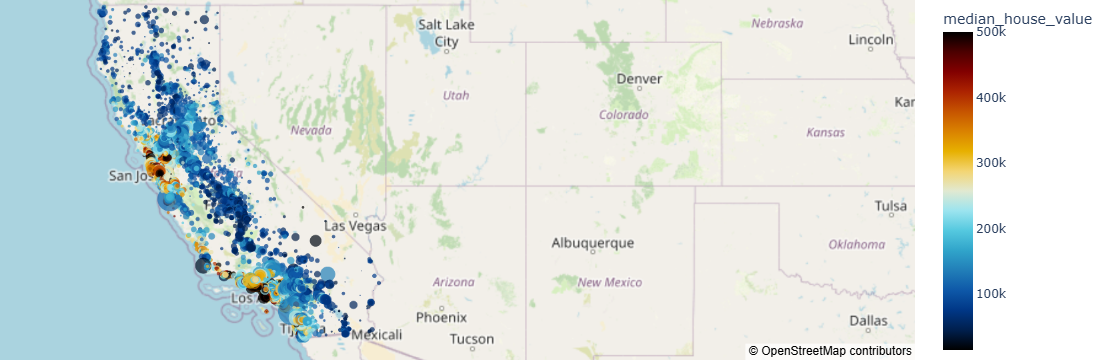

In [21]:
fig = px.scatter_mapbox(data, lat='latitude', lon='longitude', size='population', color='median_house_value', color_continuous_scale=px.colors.cyclical.IceFire)
fig.update_layout(mapbox_style="open-street-map",margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

## interpretation 
- Houses which are **close to sea** have **high** prices . we can create new column which will calculate distance from the ocean.

In [30]:
high_price_points = [
    (34.0195, -118.4912),  # Santa Monica Beach, CA
    (37.7749, -122.4194),  # San Francisco, CA (near the coast)
    (32.7157, -117.1611),  # San Diego, CA
    (36.7783, -121.7895),  # Monterey, CA
    (35.3733, -120.8560),  # San Luis Obispo, CA
    (33.8847,-118.4109)    # manhatten beach
]

def distance_calculator(lat,lon, coastal_points):
    house_coord = (lat, lon)
    distances = [geodesic(house_coord, coast_coords).kilometers for coast_coords in high_price_points]
    return min(distances)

data_new['min_distance_from_ocean'] = data_new.apply(lambda row: distance_calculator(row['latitude'], row['longitude'], high_price_points), axis=1)
print(data_new[['latitude', 'longitude', 'min_distance_from_ocean']].head())


   latitude  longitude  min_distance_from_ocean
2     37.85    -122.24                17.861487
3     37.85    -122.25                17.087641
4     37.85    -122.25                17.087641
5     37.85    -122.25                17.087641
6     37.84    -122.25                16.575451


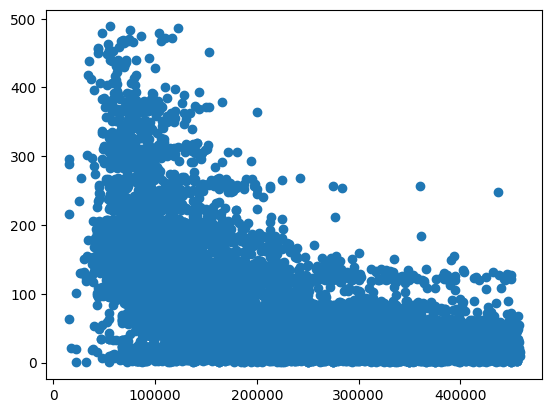

In [33]:
plt.scatter(data_new['median_house_value'],data_new['min_distance_from_ocean'])

## interpretation 
- if distance from ocean is **less** then prices are **higher**. and distance is **more** then prices are **lower**.

In [34]:
correlation = data_new['median_house_value'].corr(data_new['min_distance_from_ocean'])
print(correlation)

-0.480991521739544


In [35]:
# caclculate how many bedrooms are there per room
data_new['bedroom_per_room'] = data_new['total_rooms'] / data_new['total_bedrooms']
correlation = data_new['median_house_value'].corr(data_new['bedroom_per_room'])
print(correlation)

0.3011306274317559


In [38]:
# how many people are there in the family
data_new['population_per_household'] = data_new['population'] / data_new['households']

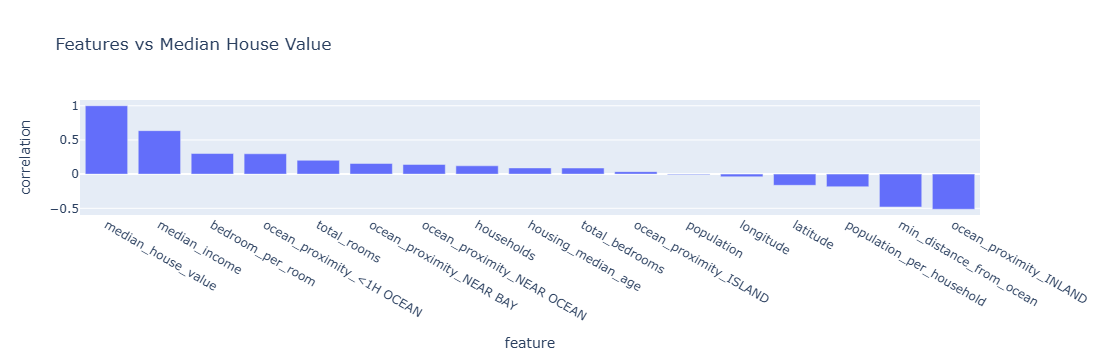

In [39]:
correlation = data_new.corr()
output = correlation['median_house_value'].sort_values(ascending=False)
output_df = output.reset_index()
output_df.columns = ['feature', 'correlation']

fig = px.bar(output_df, x='feature', y='correlation', title='Features vs Median House Value')
fig.show()

## interpretation 
- important features are **median_income,bedroom_per_room,min_distance_from_ocean,ocean_proximity_inland,population_per_household**

## applying trasnformation to deal with skewness

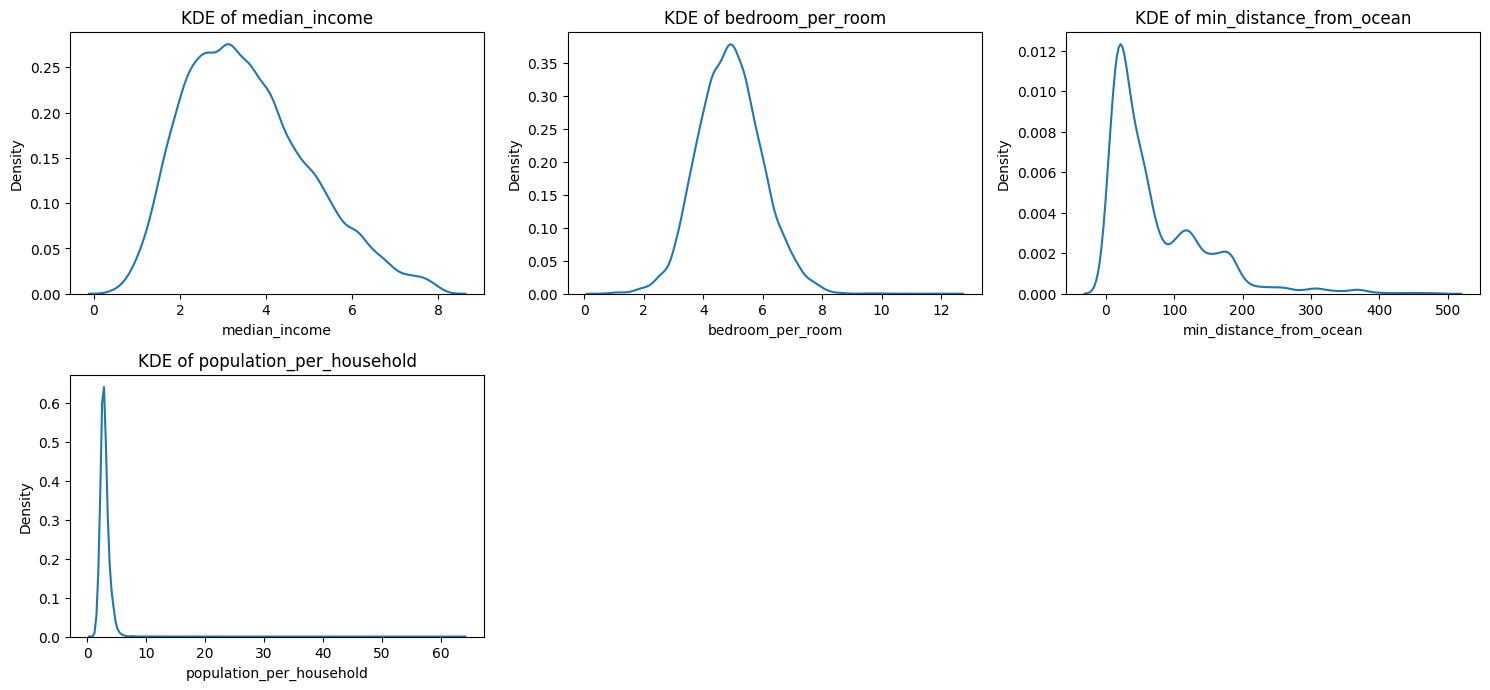

In [41]:
x =  data_new[['median_income','bedroom_per_room','min_distance_from_ocean','population_per_household']]
plt.figure(figsize=(15, 10))
for i, column in enumerate(x, 1):
    plt.subplot(3, 3, i)
    sns.kdeplot(data_new[column])
    plt.title(f"KDE of {column}")
plt.tight_layout()
plt.show()

In [61]:
data_new['cbrt_median_income'] = np.sqrt(data_new['median_income'])  
data_new['cbrt_bedroom_per_room'] = np.sqrt(data_new['bedroom_per_room'])
data_new['cbrt_min_distance_from_ocean'] = np.sqrt(data_new['min_distance_from_ocean'])
data_new['boxcox_population_per_household'], _ = stats.boxcox(data_new['population_per_household'] + 1)  
# i added one in boxboc transformation bcoz to avoid zero and negative values
data_new['cbrt_median_house_value'] = np.log(data_new['median_house_value']+1)

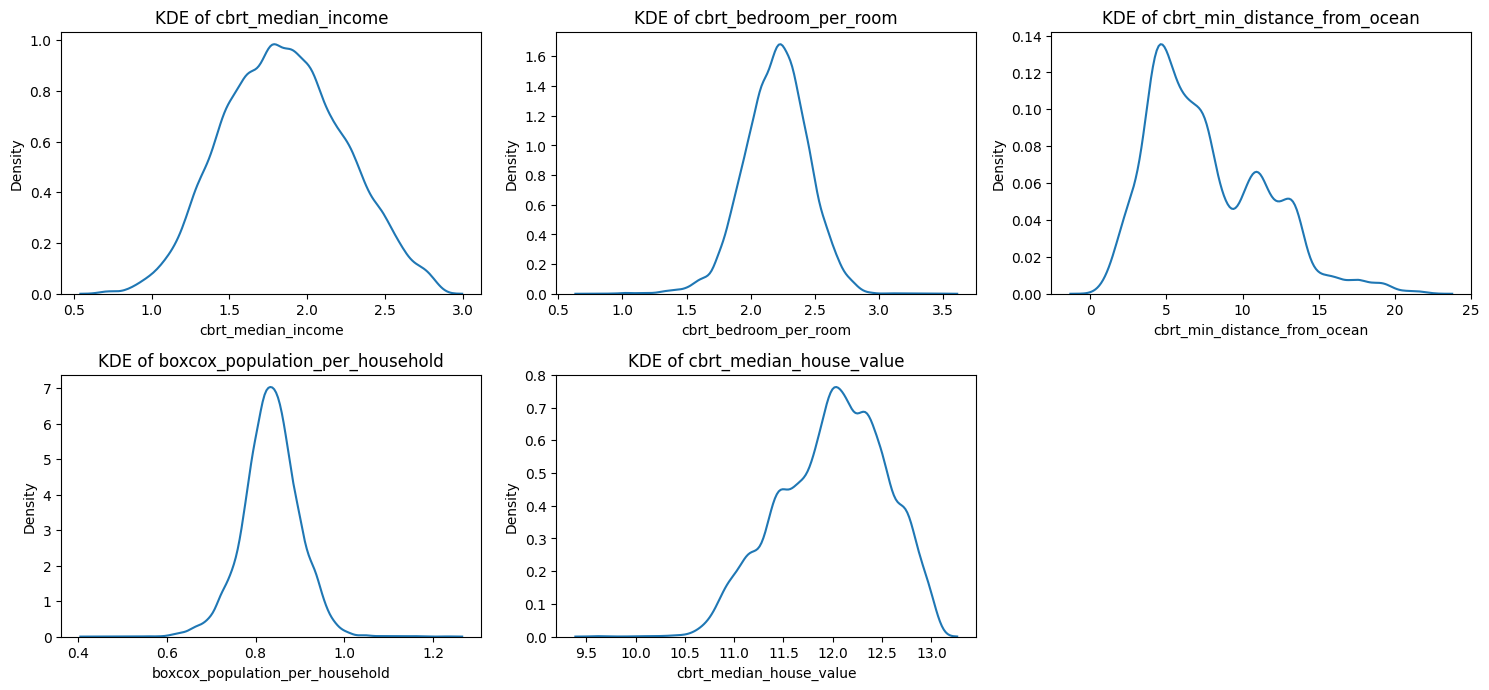

In [62]:
x =  data_new[['cbrt_median_income','cbrt_bedroom_per_room','cbrt_min_distance_from_ocean','boxcox_population_per_household','cbrt_median_house_value']]
plt.figure(figsize=(15, 10))
for i, column in enumerate(x, 1):
    plt.subplot(3, 3, i)
    sns.kdeplot(data_new[column])
    plt.title(f"KDE of {column}")
plt.tight_layout()
plt.show()

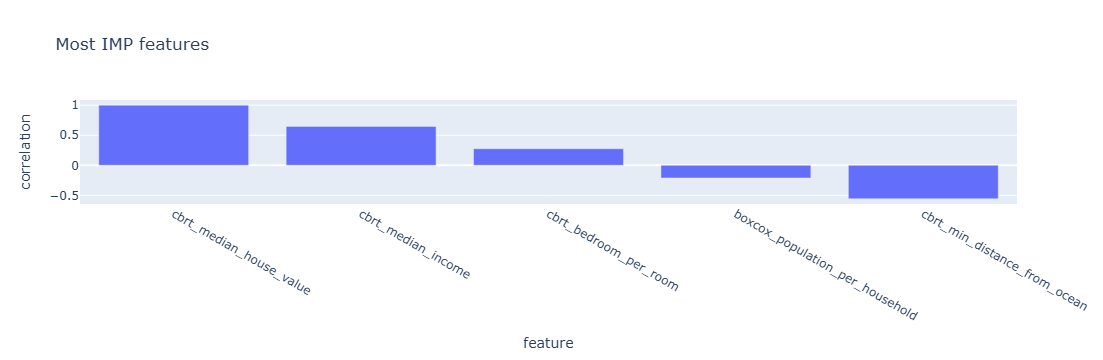

In [63]:
x =  data_new[['cbrt_median_income','cbrt_bedroom_per_room','cbrt_min_distance_from_ocean','boxcox_population_per_household','cbrt_median_house_value']].corr()

output = x['cbrt_median_house_value'].sort_values(ascending=False)
output_df = output.reset_index()
output_df.columns = ['feature', 'correlation']

fig = px.bar(output_df, x='feature', y='correlation', title='Most IMP features')
fig.show()

# model building

In [64]:
X = data_new[['cbrt_median_income','cbrt_bedroom_per_room','cbrt_min_distance_from_ocean','boxcox_population_per_household','ocean_proximity_INLAND']]
y = data_new['cbrt_median_house_value'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R²) Score:", r2)

Mean Squared Error (MSE): 0.09507515391659949
R-squared (R²) Score: 0.6586909550060964


In [65]:
final_ml_V = smf.ols('cbrt_median_house_value ~ cbrt_median_income + cbrt_bedroom_per_room + cbrt_min_distance_from_ocean+ ocean_proximity_INLAND+ boxcox_population_per_household', data=data_new).fit()
print(final_ml_V.rsquared)

0.6828386308516545


In [72]:
# testing
x_testing = X_test.copy()
X_test_ols = sm.add_constant(x_testing) 
predict = final_ml_V.predict(X_test_ols)
originals = np.exp(predict) - 1
print(originals)

1167      71898.733906
10414    218578.232714
8144     289468.178574
13280    117014.641053
6411     191072.279319
             ...      
6059     235103.415767
14439    204416.613652
7119     196539.017482
3109     170933.671302
419      372839.156456
Length: 3380, dtype: float64
